<h1> Naive Bayes Model on Kaggle Competition Fake News Dataset </h1>
<h3> The fake news dataset is publicly available <a href="https://www.kaggle.com/c/fake-news">here</a></h3>

In [18]:
import util
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, plot_confusion_matrix
import naive_bayes as nb

In [7]:
folder_path = '../../datasets/kaggle_comp/split_files/'
train_file = 'train.csv'
test_file = 'test.csv'

train_X, train_Y = util.load_dataset(folder_path, train_file)
test_X, test_Y = util.load_dataset(folder_path, test_file)

<h2> Base Model with Term Frequency</h2>

In [8]:
base_model = nb.BaseNaiveBayesModel(ngram=(1,2))
base_model.fit(train_X, train_Y)

Pipeline(steps=[('tfidf',
                 CountVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anythin

In [9]:
pred_Y = base_model.predict(test_X)
util.print_accuracy_measures(test_Y, pred_Y, label="naive_bayes_big_base_comp")

Accuracy of Logistic Regression Classifier: 95.29%

CLassification Report of naive_bayes_base_clement_classification_report Classifier:

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      3505
           1       0.95      0.95      0.95      3230

    accuracy                           0.95      6735
   macro avg       0.95      0.95      0.95      6735
weighted avg       0.95      0.95      0.95      6735



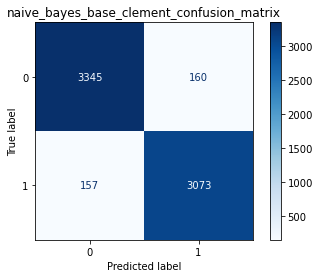

In [10]:
util.visualize_confusion_matrix(base_model,test_X, test_Y,"naive_bayes_big_base_comp_confusion_matrix")

<function util.plot_cv_score(cv_results, title='CV Score', savefig=True)>

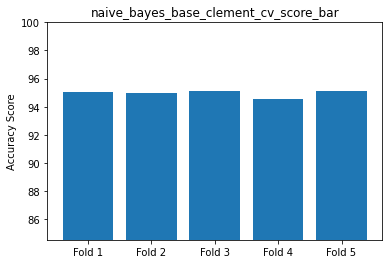

In [11]:
base_cv_results = cross_validate(base_model, train_X, train_Y, cv=KFold(5))
util.plot_cv_score(base_cv_results,title="naive_bayes_big_base_comp_cv_score_bar")

<module 'matplotlib.pyplot' from 'C:\\Users\\chris\\miniconda3\\envs\\fakenews\\lib\\site-packages\\matplotlib\\pyplot.py'>

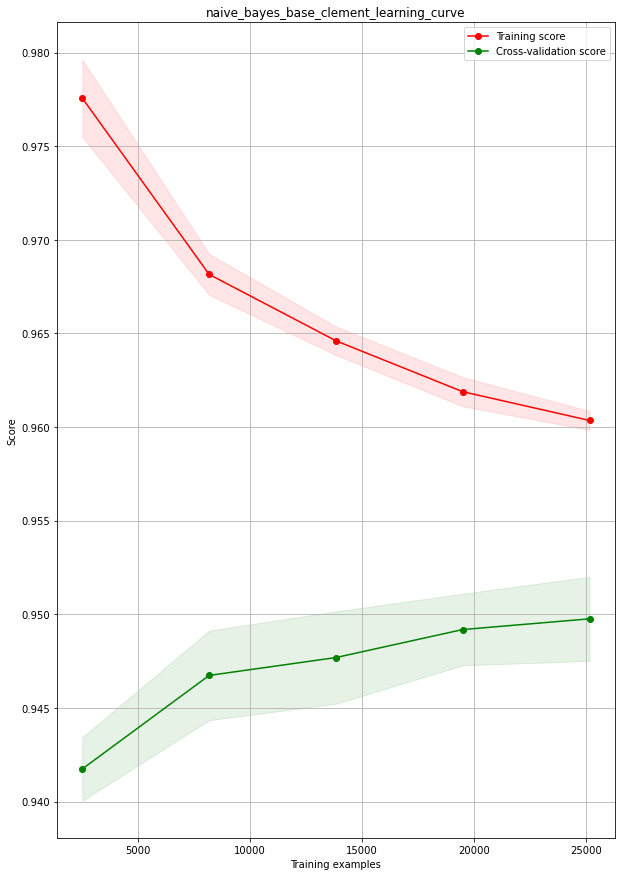

In [12]:
util.plot_learning_curve(base_model, "naive_bayes_big_base_comp_learning_curve", train_X,train_Y, cv=KFold(5), n_jobs=4)

In [ ]:
util.plot_word_cloud(base_model,"naive_bayes_big_base_comp_word_cloud")

<h2> Adding TFIDF </h2>

In [13]:
tfidf_model = nb.TFIDFNaiveBayesModel(ngram=(1,2))
tfidf_model.fit(train_X, train_Y)

Pipeline(steps=[('tf',
                 TfidfVectorizer(stop_words=frozenset({'a', 'about', 'above',
                                                       'across', 'after',
                                                       'afterwards', 'again',
                                                       'against', 'all',
                                                       'almost', 'alone',
                                                       'along', 'already',
                                                       'also', 'although',
                                                       'always', 'am', 'among',
                                                       'amongst', 'amoungst',
                                                       'amount', 'an', 'and',
                                                       'another', 'any',
                                                       'anyhow', 'anyone',
                                                       'anything',

In [14]:
pred_Y = tfidf_model.predict(test_X)
util.print_accuracy_measures(test_Y, pred_Y, label="naive_bayes_big_tfidf_comp")

Accuracy of Logistic Regression Classifier: 93.67%

CLassification Report of naive_bayes_tfidf_clement_classification_report Classifier:

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      3505
           1       0.94      0.93      0.93      3230

    accuracy                           0.94      6735
   macro avg       0.94      0.94      0.94      6735
weighted avg       0.94      0.94      0.94      6735



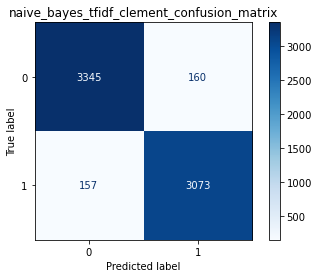

In [15]:
util.visualize_confusion_matrix(base_model,test_X, test_Y,"naive_bayes_big_tfidf_comp_confusion_matrix")

<function util.plot_cv_score(cv_results, title='CV Score', savefig=True)>

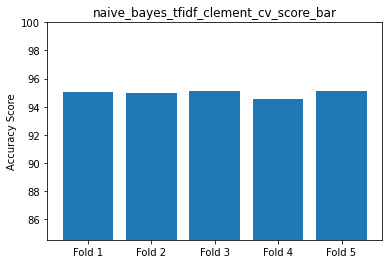

In [16]:
tfidf_cv_results = cross_validate(base_model, train_X, train_Y, cv=KFold(5))
util.plot_cv_score(base_cv_results,title="naive_bayes_big_tfidf_comp_cv_score_bar")

<module 'matplotlib.pyplot' from 'C:\\Users\\chris\\miniconda3\\envs\\fakenews\\lib\\site-packages\\matplotlib\\pyplot.py'>

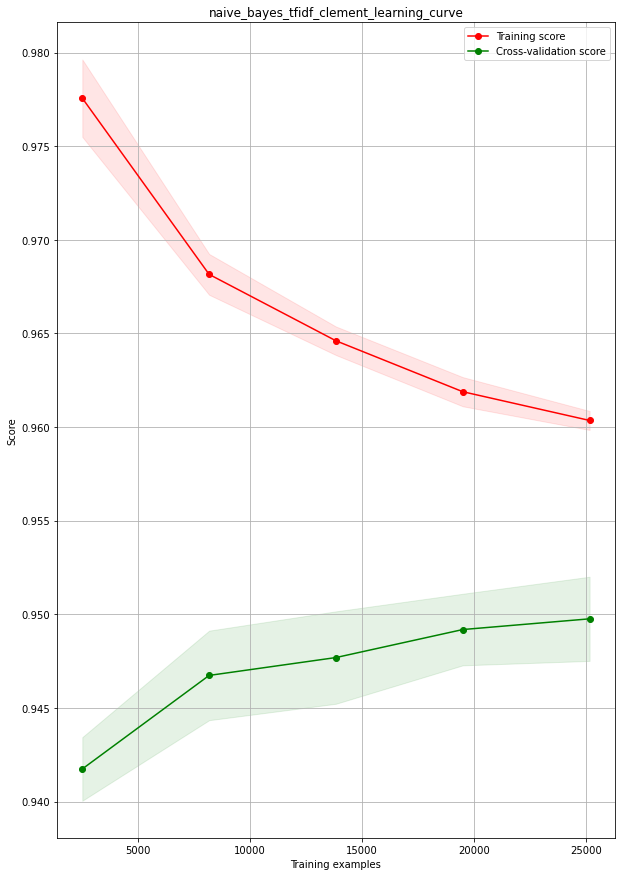

In [17]:
util.plot_learning_curve(base_model, "naive_bayes_big_tfidf_comp_learning_curve", train_X,train_Y, cv=KFold(5), n_jobs=4)

In [ ]:
util.plot_word_cloud(tfidf_model,"naive_bayes_big_tfidf_comp_word_cloud")